In [1]:
import pandas as pd
import numpy as np
import sklearn as skl
import seaborn as sns

In [6]:
df = pd.read_excel('apartment_deals_price.xlsx', sheet_name='selected_data')

In [7]:
names=['city_1', 'city_2', 'city_3', 'address', 'size', 'floor', 'built_year', 'price']
df = df[names]
df

,city_1,city_2,city_3,address,size,floor,built_year,price
0,서울특별시,강남구,개포동,선릉로 8,126.928,18,2019,4360000000
1,서울특별시,강남구,개포동,삼성로 11,106.670,6,2019,3980000000
2,서울특별시,강남구,개포동,개포로 409,163.850,4,1986,3900000000
3,서울특별시,강남구,개포동,언주로 110,182.200,10,1984,3800000000
4,서울특별시,강남구,개포동,언주로 110,182.200,2,1984,3800000000
...,...,...,...,...,...,...,...,...
43371,서울특별시,중랑구,중화동,중랑천로14길 58,17.940,11,2012,118700000
43372,서울특별시,중랑구,중화동,중랑천로14길 58,17.940,12,2012,118000000
43373,서울특별시,중랑구,중화동,중랑천로14길 58,17.940,13,2012,118000000
43374,서울특별시,중랑구,중화동,중랑천로14길 58,17.940,12,2012,112000000


In [8]:
df['new_address'] = df['city_2'] + " " + df['address']
df

,city_1,city_2,city_3,address,size,floor,built_year,price,new_address
0,서울특별시,강남구,개포동,선릉로 8,126.928,18,2019,4360000000,강남구 선릉로 8
1,서울특별시,강남구,개포동,삼성로 11,106.670,6,2019,3980000000,강남구 삼성로 11
2,서울특별시,강남구,개포동,개포로 409,163.850,4,1986,3900000000,강남구 개포로 409
3,서울특별시,강남구,개포동,언주로 110,182.200,10,1984,3800000000,강남구 언주로 110
4,서울특별시,강남구,개포동,언주로 110,182.200,2,1984,3800000000,강남구 언주로 110
...,...,...,...,...,...,...,...,...,...
43371,서울특별시,중랑구,중화동,중랑천로14길 58,17.940,11,2012,118700000,중랑구 중랑천로14길 58
43372,서울특별시,중랑구,중화동,중랑천로14길 58,17.940,12,2012,118000000,중랑구 중랑천로14길 58
43373,서울특별시,중랑구,중화동,중랑천로14길 58,17.940,13,2012,118000000,중랑구 중랑천로14길 58
43374,서울특별시,중랑구,중화동,중랑천로14길 58,17.940,12,2012,112000000,중랑구 중랑천로14길 58


# Convert address to location coordinates #

from geopy import Nominatim
from geopy import distance

dist = dict()
lati = dict()
long = dict()

no_addr = []

locator = Nominatim(user_agent="myGeocoder")

city_hall_coor = (locator.geocode("세종대로 110").latitude, locator.geocode("세종대로 110").longitude)

for idx, addr in enumerate(df['new_address'].unique()):
	try:
		location = locator.geocode(addr)
		lati[addr] = location.latitude
		long[addr] = location.longitude
		dist[addr] = distance.distance(city_hall_coor, (location.latitude, location.longitude)).km

		print('pct: {}%, addr: {} => (lat: {}, long: {}, dist: {})'.format((idx+1)/5794*100, addr, lati[addr], long[addr], dist[addr]))
	except:
		print(addr, 'could not find its coordinates')
		no_addr.append(addr)

In [24]:
from geopy import Nominatim
from geopy import distance

import requests
from urllib.parse import urlparse

dist_dict = dict()
lati_dict = dict()
long_dict = dict()

no_addr = []

locator = Nominatim(user_agent="myGeocoder")
city_hall_coor = (locator.geocode("세종대로 110").latitude, locator.geocode("세종대로 110").longitude)

for idx, addr in enumerate(df['new_address'].unique()):
	try:
		url = 'https://dapi.kakao.com/v2/local/search/address.json?&query=' + addr
		result = requests.get(urlparse(url).geturl(), headers={'Authorization': 'KakaoAK b835f8f34eed2ee673250126a3f100f4'}).json()
		match_first = result['documents'][0]['address']

		# location = locator.geocode(addr)
		# lati[addr] = location.latitude
		# long[addr] = location.longitude
		lati_dict[addr] = float(match_first['y'])
		long_dict[addr] = float(match_first['x'])
		dist_dict[addr] = distance.distance(city_hall_coor, (lati_dict[addr], long_dict[addr])).km

		print('pct: {}%, addr: {} => (lat: {}, long: {}, dist: {})'.format((idx+1)/5794*100, addr, lati_dict[addr], long_dict[addr], dist_dict[addr]))
	except:
		print(addr, 'could not find its coordinates')
		no_addr.append(addr)

pct: 0.01725923369002416%, addr: 강남구 선릉로 8 => (lat: 37.480057578933, long: 127.064153382762, dist: 12.219315034206875)
pct: 0.03451846738004832%, addr: 강남구 삼성로 11 => (lat: 37.4844402093504, long: 127.067960222798, dist: 12.060181345177302)
pct: 0.05177770107007249%, addr: 강남구 개포로 409 => (lat: 37.4883239313325, long: 127.061169470744, dist: 11.341962108873938)
pct: 0.06903693476009665%, addr: 강남구 언주로 110 => (lat: 37.4854108088377, long: 127.054704829281, dist: 11.238422001719005)
pct: 0.08629616845012082%, addr: 강남구 개포로 307 => (lat: 37.4846310565134, long: 127.056092038196, dist: 11.38139468779493)
pct: 0.10355540214014498%, addr: 강남구 개포로 303 => (lat: 37.4832803381496, long: 127.054393140278, dist: 11.41210890956389)
pct: 0.12081463583016915%, addr: 강남구 개포로 405 => (lat: 37.4872157015842, long: 127.060273615454, dist: 11.385632273330003)
pct: 0.1380738695201933%, addr: 강남구 개포로 264 => (lat: 37.4797503513842, long: 127.052228213432, dist: 11.622324997924103)
pct: 0.15533310321021745%, addr

In [ ]:
import requests
from urllib.parse import urlparse
for address in no_addr:
	url = 'https://dapi.kakao.com/v2/local/search/address.json?&query=' + address
	result = requests.get(urlparse(url).geturl(), headers={'Authorization': 'KakaoAK b835f8f34eed2ee673250126a3f100f4'}).json()
	match_first = result['documents'][0]['address']
	lat = float(match_first['y'])
	lng = float(match_first['x'])
	

In [25]:
no_addr

['강남구 영동대로128길 15',
 '강동구 천중로 264',
 '강동구 진황도로 18',
 '강동구 진황도로 12',
 '강서구 화곡로21길 71-1',
 '강서구 곰달래로18길 33-1',
 '관악구  27',
 '관악구 구암길 95',
 '광진구 뚝섬로 45',
 '구로구 구로중앙로18길 11-1',
 '금천구 시흥대로 291-1',
 '동대문 한천로24길 74-11',
 '동작구 사당로23길 4',
 '동작구  27',
 '마포구 효창원로93길 18',
 '서초구 강남대로39길 15-1',
 '서초구 나루터로4길 49',
 '서초구 나루터로4길 28',
 '서초구 잠원로4길 34-11',
 '서초구 신반포로33길 30',
 '서초구 나루터로4길 39',
 '서초구 신반포로 267',
 '성북구  37',
 '송파구 올림픽로 399',
 '용산구 한강대로62길 45-1',
 '용산구 유엔빌리지길 80-1',
 '은평구 서오릉로2길 12-1',
 '은평구 통일로65길 1-1',
 '은평구 서오릉로 80-1',
 '은평구 통일로65길 3-1',
 '은평구 연서로28길 12-1',
 '은평구 연서로28길 8-1',
 '은평구 서오릉로 119-1',
 '은평구 서오릉로 107-1',
 '은평구 은평로 116-1',
 '종로구 평창문화로 171',
 '종로구 세검정로 384-13',
 '중구 서소문로 89-1',
 '중랑구 봉화산로1길 16']

In [26]:
new_addr = {
	'강남구 영동대로128길 15':'37.5199625,127.0573796',
	'강동구 천중로 264':'37.5396021,127.1472591',
	'강동구 진황도로 18':'37.5393977,127.1267621',
	'강동구 진황도로 12':'37.5386759,127.1261437',
	'강서구 화곡로21길 71-1':'37.5403939,126.8330997',
	'강서구 곰달래로18길 33-1':'37.5287512,126.8400154',
	'관악구  27':'37.4842408,126.9354367',
	'관악구 구암길 95':'37.4915053,126.9445855',
	'광진구 뚝섬로 45':'37.5336664,127.0755005',
	'구로구 구로중앙로18길 11-1':'37.4950835,126.8878291',
	'금천구 시흥대로 291-1':'37.4611632,126.8927868',
	'동대문 한천로24길 74-11':'37.5681599,127.0661988',
	'동작구 사당로23길 4':'37.486995,126.9678221',
	'동작구  27':'37.485685,126.9606768',
	'마포구 효창원로93길 18':'37.5484817,126.9600567',
	'서초구 강남대로39길 15-1':'37.4858948,127.0313779',
	'서초구 나루터로4길 49':'37.5105427,127.0118349',
	'서초구 나루터로4길 28':'37.5115117,127.0101548',
	'서초구 잠원로4길 34-11':'37.5117162,127.0089611',
	'서초구 신반포로33길 30':'37.5112721,127.0082226',
	'서초구 나루터로4길 39':'37.5125168,127.011931',
	'서초구 신반포로 267':'37.5091089,127.0114771',
	'성북구  37':'37.5840776,127.0187608',
	'송파구 올림픽로 399':'37.5183239,127.1085036',
	'용산구 한강대로62길 45-1':'37.5328297,126.971493',
	'용산구 유엔빌리지길 80-1':'37.5322288,127.0091033',
	'은평구 서오릉로2길 12-1':'37.6021139,126.9256897',
	'은평구 통일로65길 1-1':'37.6090074,126.9284392',
	'은평구 서오릉로 80-1':'37.6074525,126.919948',
	'은평구 통일로65길 3-1':'37.608937,126.9283202',
	'은평구 연서로28길 12-1':'37.6172734,126.9196284',
	'은평구 연서로28길 8-1':'37.6177852,126.918537',
	'은평구 서오릉로 119-1':'37.6099049,126.9166778',
	'은평구 서오릉로 107-1':'37.6092379,126.9175358',
	'은평구 은평로 116-1':'37.5999023,126.9185145',
	'종로구 평창문화로 171':'37.6109493,126.9764674',
	'종로구 세검정로 384-13':'37.6075659,126.9711736',
	'중구 서소문로 89-1':'37.5625543,126.9686235',
	'중랑구 봉화산로1길 16':'37.6023589,127.0731882',
}

for addr in new_addr.keys():
	lat, long = new_addr[addr].split(',')
	lati_dict[addr] = float(lat)
	long_dict[addr] = float(long)
	print(lati_dict[addr], long_dict[addr])
	

37.5199625 127.0573796
37.5396021 127.1472591
37.5393977 127.1267621
37.5386759 127.1261437
37.5403939 126.8330997
37.5287512 126.8400154
37.4842408 126.9354367
37.4915053 126.9445855
37.5336664 127.0755005
37.4950835 126.8878291
37.4611632 126.8927868
37.5681599 127.0661988
37.486995 126.9678221
37.485685 126.9606768
37.5484817 126.9600567
37.4858948 127.0313779
37.5105427 127.0118349
37.5115117 127.0101548
37.5117162 127.0089611
37.5112721 127.0082226
37.5125168 127.011931
37.5091089 127.0114771
37.5840776 127.0187608
37.5183239 127.1085036
37.5328297 126.971493
37.5322288 127.0091033
37.6021139 126.9256897
37.6090074 126.9284392
37.6074525 126.919948
37.608937 126.9283202
37.6172734 126.9196284
37.6177852 126.918537
37.6099049 126.9166778
37.6092379 126.9175358
37.5999023 126.9185145
37.6109493 126.9764674
37.6075659 126.9711736
37.5625543 126.9686235
37.6023589 127.0731882


In [41]:
long_df = pd.DataFrame.from_dict(long_dict, 'index', columns=['longitude'])
lati_df = pd.DataFrame.from_dict(lati_dict, 'index', columns=['latitude'])
dist_df = pd.DataFrame.from_dict(dist_dict, 'index', columns=['distance'])

# long_df.reset_indeinplace=True)
# long_df.columns = ['address', 'longitude']
# long_df

# lati_df.reset_index(inplace=True)
# lati_df.columns = ['address', 'latitude']
# lati_df

# df.join([lati_df, long_df], on='address')
# df

lat_lon_dist_df = df.join(lati_df, on="new_address").join(long_df, on="new_address").join(dist_df, on="new_address")
lat_lon_dist_df.to_csv('result_lat_lon_dist.csv', index=False)

In [40]:
lat_lon_dist_df.to_csv()


,latitude
강남구 선릉로 8,37.480058
강남구 삼성로 11,37.484440
강남구 개포로 409,37.488324
강남구 언주로 110,37.485411
강남구 개포로 307,37.484631
...,...
은평구 은평로 116-1,37.599902
종로구 평창문화로 171,37.610949
종로구 세검정로 384-13,37.607566
중구 서소문로 89-1,37.562554


In [121]:
city_hall_coor = (locator.geocode("세종대로 110").latitude, locator.geocode("세종대로 110").longitude)

locator.geocode("세종대로 110")

sample_coor = (lati['선릉로 8'], long['선릉로 8'])

In [29]:
from geopy import distance

distance.distance(city_hall_coor, sample_coor).km

dist = dict()
for addr in lati_dict.keys():
	dist[addr] = distance.distance(city_hall_coor, (lati_dict[addr], long_dict[addr])).km
dist

NameError: name 'sample_coor' is not defined

In [151]:
dist_df = pd.DataFrame.from_dict(dist, 'index', columns=['distance_center'])
lat_lon_dist_df = lat_lon_df.join(dist_df, on="address")
lat_lon_dist_df.to_csv('result_lat_lon_dist.csv', index=False)


# graph #

In [49]:
dist_df = pd.read_csv('result_lat_lon_dist.csv')
dist_df.groupby('city_2').mean()

,size,floor,built_year,price,latitude,longitude,distance
city_2,,,,,,,
강남구,87.762222,9.823897,1999.411502,2.071658e+09,37.498652,127.057670,10.340900
강동구,65.457399,9.577017,2006.483130,9.361770e+08,37.543782,127.142000,14.737720
강북구,72.661615,8.869099,2003.315451,6.696111e+08,37.626491,127.023688,7.854769
강서구,68.884254,7.664218,2002.115075,7.922241e+08,37.557540,126.840264,12.316491
관악구,68.281988,9.362358,2003.188881,7.296404e+08,37.479273,126.942012,10.285366
광진구,78.793417,10.331099,2000.021448,1.197483e+09,37.541541,127.085514,9.925472
구로구,64.673638,9.067675,2001.638185,6.203255e+08,37.495298,126.866409,12.712310
금천구,67.045751,10.758342,2003.541962,5.956907e+08,37.460187,126.902433,13.609821
노원구,62.025586,8.148213,1994.495471,6.728362e+08,37.646895,127.066576,11.965050


<AxesSubplot:xlabel='distance', ylabel='price'>

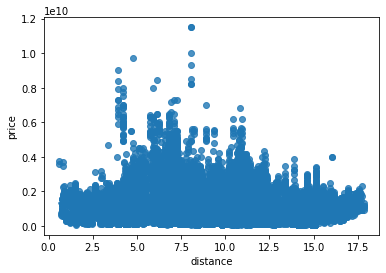

In [47]:
import matplotlib.pyplot as plt

# sns.regplot(x='size', y='price', data=dist_df)
sns.regplot(x='distance', y='price', data=dist_df)

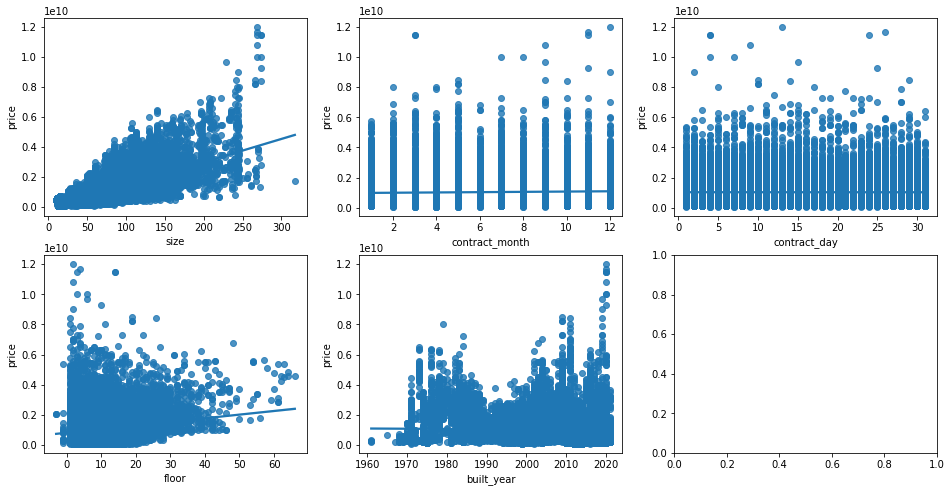

In [4]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(figsize=(16,8) , ncols=3, nrows=2)
features = ['size', 'contract_month', 'contract_day', 'floor', 'built_year']
for i, feature in enumerate(features):
	row = int(i/3)
	col = i%3
	sns.regplot(x=feature, y='price', data=df, ax=axs[row][col])

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

y_target = df['price']
# X_data = df.drop(['price', 'area', 'building_number', 'apartment_name', 'address'], axis=1, inplace=False)
X_data = df[['size']]

X_train , X_test , y_train , y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 314077012047256192.000 , RMSE : 560425741.778
Variance score : 0.473


In [6]:
coeff = pd.Series(data=np.round(lr.coef_, 2), index=X_data.columns)
coeff.sort_values(ascending=False)

size    15336088.19
dtype: float64

In [7]:
lr.coef_

array([15336088.19396688])

In [9]:
df.cov()['price']

size              1.690390e+10
contract_month    9.293981e+07
contract_day     -7.601483e+06
price             5.636872e+17
floor             9.410658e+08
built_year       -1.604358e+08
Name: price, dtype: float64

In [16]:
import math

coeff.sort_values(ascending=False, inplace=True)
res = 'PRICE = '
for idx, item in enumerate(coeff.items()):
	name, value = item
	if idx == 0:
		op = ''
	else:
		op = ' + '
	res += op + '*'.join([str(value), name.upper()])

if lr.intercept_ > 0:
	res += " + " + str(math.fabs(lr.intercept_))
else:
	res += " - " + str(math.fabs(lr.intercept_))

print(res) 

PRICE = 15336088.19*SIZE - 103847679.98495352


In [17]:
import math

coeff = pd.Series(data=np.round(lr.coef_, 2), index=X_data.columns)
coeff.sort_values(ascending=False)

coeff.sort_values(ascending=False, inplace=True)
res = 'PRICE = '
for idx, item in enumerate(coeff.items()):
  name, value = item
  if idx == 0:
    op = ''
  else:
    if value > 0:
      op = ' + '
    else:
      op = ' - '
  res += op + '*'.join([str(math.fabs(value)), name.upper()])

if lr.intercept_ > 0:
  res += " + " + str(math.fabs(lr.intercept_))
else:
  res += " - " + str(math.fabs(lr.intercept_))

# print()

print('[Linear regression]')
print(res)

print()

print('[Sorted covariance of all variables in terms of price]')
df.cov()['price'][df.cov()['price'].abs().sort_values(ascending=False).keys()]

[Linear regression]
PRICE = 15336088.19*SIZE - 103847679.98495352

[Sorted covariance of all variables in terms of price]


price             5.636872e+17
size              1.690390e+10
floor             9.410658e+08
built_year       -1.604358e+08
contract_month    9.293981e+07
contract_day     -7.601483e+06
Name: price, dtype: float64